In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #For 3D Plots

#Required by Jupyter for inlining images
%matplotlib inline

### LHC Intensity Analysis

In [3]:
LHCdata = pd.read_csv('../Data/LHC_intensity_B1.txt',sep=' ', header=None)
LHCdata.columns = ['Time Stamp','Reading']

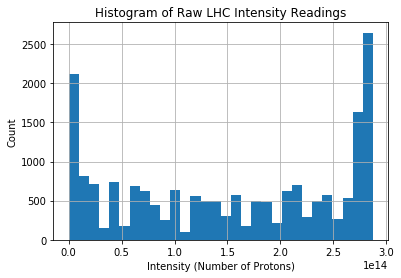

In [4]:
plt.figure()
LHCdata['Reading'].hist(bins=30)
plt.title('Histogram of Raw LHC Intensity Readings')
plt.xlabel('Intensity (Number of Protons)')
plt.ylabel('Count')
plt.savefig('../Dissertation/images/Histogram_of_LHC_Intensity')

In [5]:
LHCdataB2 = pd.read_csv('../Data/LHC_intensity_B2.txt',sep=' ', header=None)
LHCdataB2.columns = ['Time Stamp','Reading']

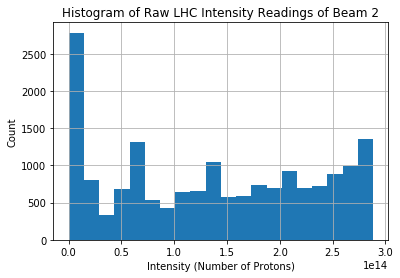

In [8]:
plt.figure()
LHCdataB2['Reading'].hist(bins=20)
plt.title('Histogram of Raw LHC Intensity Readings of Beam 2')
plt.xlabel('Intensity (Number of Protons)')
plt.ylabel('Count')
plt.savefig('../Dissertation/images/Histogram_of_LHC_Intensity')

### SPS Intensity Analysis

In [9]:
SPSdata = pd.read_csv('../Data/SPS_intensity_B1.txt',sep=' ', header=None)
SPSdata.columns = ['Time Stamp','Reading']

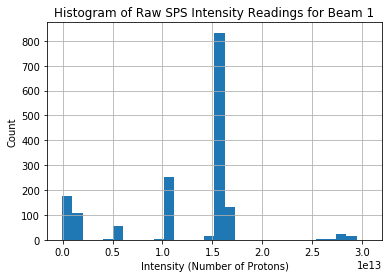

In [16]:
plt.figure()
SPSdata['Reading'].hist(bins=30)
plt.title('Histogram of Raw SPS Intensity Readings for Beam 1')
plt.xlabel('Intensity (Number of Protons)')
plt.ylabel('Count')
plt.savefig('../Dissertation/images/Histogram_of_SPS_Intensity')

In [14]:
SPSdataB2 = pd.read_csv('../Data/SPS_intensity_B2.txt',sep=' ', header=None)
SPSdataB2.columns = ['Time Stamp','Reading']

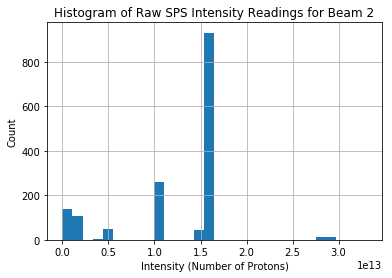

In [15]:
plt.figure()
SPSdataB2['Reading'].hist(bins=30)
plt.title('Histogram of Raw SPS Intensity Readings for Beam 2')
plt.xlabel('Intensity (Number of Protons)')
plt.ylabel('Count')
plt.savefig('../Dissertation/images/Histogram_of_SPS_Intensity')

In [22]:
LHCdata['LHC Intensity'] = LHCdata['Reading']
SPSdata['SPS Intensity'] = SPSdata['Reading']

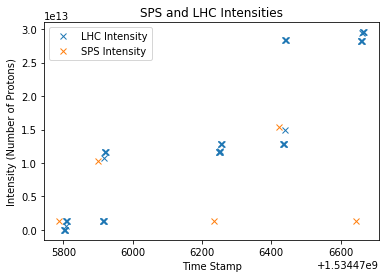

In [24]:
plt.figure()
plt.plot(LHCdata['Time Stamp'][:50],LHCdata['LHC Intensity'][:50],'x')
plt.plot(SPSdata['Time Stamp'][:5],SPSdata['SPS Intensity'][:5],'x')
plt.legend()
plt.xlabel('Time Stamp')
plt.ylabel('Intensity (Number of Protons)')
plt.title('SPS and LHC Intensities')
plt.savefig('../Dissertation/images/SPS_and_LHC_Intensities')

### Old Analysis (Not Useful):

In [32]:
data = pd.read_csv('../Data/SPS_intensity_B1.txt',sep=' ', header=None)
data.columns = ['Time Stamp','Reading']
#SPS Intensity is the Intensity right before Extraction
#Intensity - Number of bunches
#Measured in /cm(s)

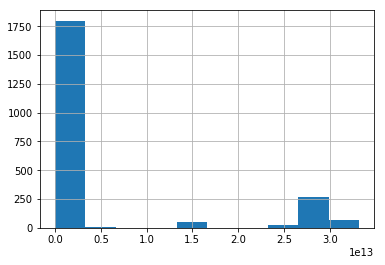

In [3]:
data['Reading'].hist()

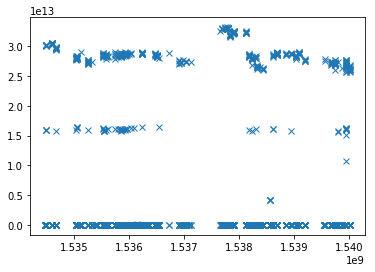

In [4]:
plt.plot(data['Time Stamp'],data['Reading'],'x')

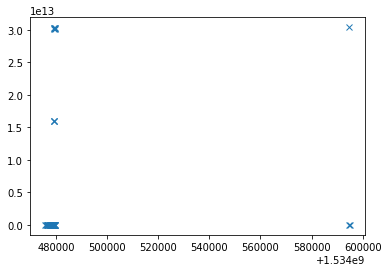

In [5]:
sample = data[:50]
plt.plot(sample['Time Stamp'],sample['Reading'],'x')

In [23]:
LHCdata = pd.read_csv('../Data/LHC_intensity_B1.txt',sep=' ', header=None)
LHCdata.columns = ['Time Stamp','Reading']

In [7]:
LHCdata.head()

,Time Stamp,Reading
0,1.534476e+09,5.293836e+09
1,1.534476e+09,5.291130e+09
2,1.534476e+09,5.290173e+09
3,1.534476e+09,5.288341e+09
4,1.534476e+09,5.287655e+09


In [8]:
LHCdata.describe()

,Time Stamp,Reading
count,1.897700e+04,1.897700e+04
mean,1.537150e+09,1.518267e+14
std,1.675326e+06,1.019045e+14
min,1.534476e+09,0.000000e+00
25%,1.535796e+09,5.862277e+13
50%,1.536506e+09,1.577187e+14
75%,1.538614e+09,2.597633e+14
max,1.540021e+09,2.874403e+14


In [9]:
data.describe()

,Time Stamp,Reading
count,2.212000e+03,2.212000e+03
mean,1.537167e+09,5.053109e+12
std,1.672748e+06,1.076520e+13
min,1.534476e+09,-2.829600e+10
25%,1.535796e+09,-4.716000e+09
50%,1.536547e+09,4.716000e+09
75%,1.538614e+09,1.414800e+10
max,1.540021e+09,3.322422e+13


In [5]:
def arrangeData(df):
    #This function will find the row with the maximum sum of each 10s
    #window and store the required data in a new dataframe
    columns = ['Time Stamp', 'Reading']
    resulting_df = pd.DataFrame(columns=columns)
    i = 0
    while i < len(df):
        temp_df = df[i:i+9]
        row = temp_df.loc[temp_df['Reading'].idxmax()]
        resulting_df = resulting_df.append(row,ignore_index=True)
        i = i + 10
    return resulting_df
            

In [6]:
LHCIntensities = arrangeData(LHCdata)
SPSIntensities = arrangeData(data)

In [12]:
print(LHCIntensities.describe())
print(SPSIntensities.describe())

         Time Stamp       Reading
count  1.898000e+03  1.898000e+03
mean   1.537149e+09  1.620969e+14
std    1.676050e+06  9.974054e+13
min    1.534476e+09  8.790552e+10
25%    1.535795e+09  6.920271e+13
50%    1.536506e+09  1.738259e+14
75%    1.538614e+09  2.720423e+14
max    1.540021e+09  2.874403e+14
         Time Stamp       Reading
count  2.220000e+02  2.220000e+02
mean   1.537176e+09  2.005590e+13
std    1.681092e+06  1.312183e+13
min    1.534476e+09  0.000000e+00
25%    1.535796e+09  1.886400e+10
50%    1.536547e+09  2.786449e+13
75%    1.538603e+09  2.875935e+13
max    1.540021e+09  3.322422e+13


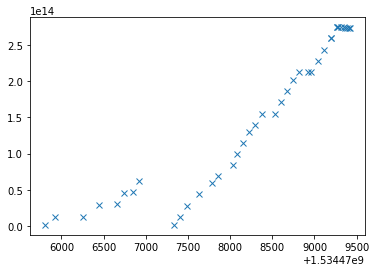

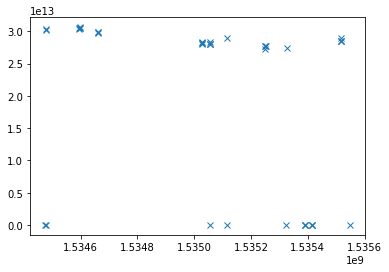

In [9]:

plt.plot(LHCIntensities['Time Stamp'][:40],LHCIntensities['Reading'][:40],'x')
plt.figure()
plt.plot(SPSIntensities['Time Stamp'][:40],SPSIntensities['Reading'][:40],'x')

In [14]:
#Beam 1 Transfer Line Intensities
data = pd.read_csv('../Data/TI2_intensity.txt',sep=' ', header=None)
data.columns = ['Time Stamp','Reading']

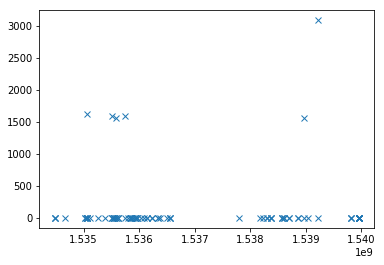

In [15]:
plt.plot(data['Time Stamp'],data['Reading'],'x')

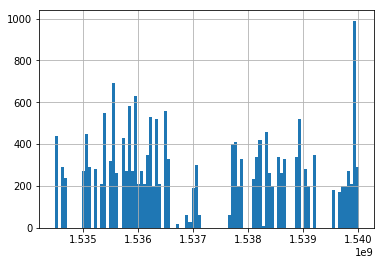

In [17]:
LHCdata['Time Stamp'].hist(bins=100)

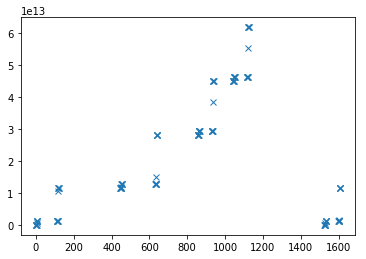

In [31]:
length = 100
plt.plot(LHCdata['Time Stamp'][:length]-LHCdata['Time Stamp'][0],LHCdata['Reading'][:length],'x')

In [39]:
TI2data = pd.read_csv('../Data/TI2_intensity.txt',sep=' ', header=None)
data.columns = ['Time Stamp','Reading']

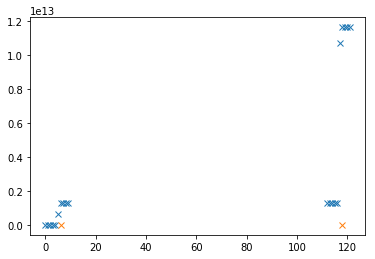

In [41]:
plt.figure()
plt.plot(LHCdata['Time Stamp'][:20]-LHCdata['Time Stamp'][0],LHCdata['Reading'][:20],'x')
plt.plot(data['Time Stamp'][:2]-LHCdata['Time Stamp'][0],data['Reading'][:2],'x')
#plt.plot(TI2data['Time Stamp'][:2]-LHCdata['Time Stamp'][0],TI2data['Reading'][:2],'x')
plt.show()
